In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
plt.style.use('ggplot')

In [177]:

df = pd.read_csv('2021MCMProblemC_DataSet.csv')
classes = ['Positive ID', 'Negative ID', 'Unverified', 'Unprocessed']
colors = [['orange', 'teal', 'tab:pink', 'tab:brown'], ['red', 'blue', 'tab:purple', 'brown']]

df_negative = df.loc[df['Lab Status'] == 'Negative ID']
df_negative['Detection Date'] = pd.to_datetime(df_negative['Detection Date'], errors = 'coerce')
df_negative['Submission Date'] = pd.to_datetime(df_negative['Submission Date'], errors = 'coerce')
df_negative['D_Day'] = df_negative['Detection Date'].dt.day
df_negative['D_Month'] = df_negative['Detection Date'].dt.month
df_negative['D_Year'] = df_negative['Detection Date'].dt.year
df_negative['S_Day'] = df_negative['Submission Date'].dt.day
df_negative['S_Month'] = df_negative['Submission Date'].dt.month
df_negative['S_Year'] = df_negative['Submission Date'].dt.year
print(df_negative.head())
df_negative = df_negative.drop(['GlobalID', 'Lab Status', 'Lab Comments', 'Detection Date', 'Submission Date'], axis=1)
# df_negative = df_negative.drop(['GlobalID', 'Lab Status', 'Lab Comments', 'Detection Date', 'Submission Date'], axis=1)

                                  GlobalID Detection Date  \
6   {C4F44511-EA53-4FCF-9422-E1C57703720D}     2020-02-29   
8   {89C867F1-D5ED-48C8-9586-B705F5DA9838}     2019-09-07   
9   {81670D96-4143-47B1-A9C8-83977892D53F}     2020-03-19   
12  {D30895B7-3994-45A3-BD51-E5BA881833FD}     2019-08-30   
14  {1304CF55-4FF9-490F-AF5A-5719CD110A9D}     2020-03-23   

                                                Notes   Lab Status  \
6   I’m not sure what this is, but it was the bigg...  Negative ID   
8   slow moving, i have this in the freezer still ...  Negative ID   
9   It landed on my window while working. It walke...  Negative ID   
12  Probably not an Asain Hornet but still a prett...  Negative ID   
14  Was on the garden hose. It stung (maybe just a...  Negative ID   

                                         Lab Comments Submission Date  \
6   This is a large fly that mimics bees! Thanks f...      2020-02-29   
8   Thank you for this submission. This is a harml...      2020-03

In [178]:
df_negative.head()

,Notes,Latitude,Longitude,D_Day,D_Month,D_Year,S_Day,S_Month,S_Year
6,"I’m not sure what this is, but it was the bigg...",48.729596,-122.480035,29.0,2.0,2020.0,29,2,2020
8,"slow moving, i have this in the freezer still ...",47.395721,-123.105188,7.0,9.0,2019.0,18,3,2020
9,It landed on my window while working. It walke...,47.840041,-122.323562,19.0,3.0,2020.0,19,3,2020
12,Probably not an Asain Hornet but still a prett...,47.635058,-122.057332,30.0,8.0,2019.0,19,3,2020
14,Was on the garden hose. It stung (maybe just a...,48.743610,-122.439050,23.0,3.0,2020.0,24,3,2020


In [179]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_negative['Notes'])
df_negative = df_negative.drop(['Notes'], axis=1)

In [180]:
# print(df_negative['Notes'])
# print(vectorizer.get_feature_names())

In [181]:
df_words = np.array(pd.DataFrame(X.toarray()))


In [182]:
df_negative = np.array(df_negative)
Xx = np.concatenate([df_words, df_negative], axis=1)
df = pd.DataFrame(Xx)
# df.drop(['3141'], axis=1)
# df

In [183]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,48.729596,-122.480035,29.0,2.0,2020.0,29.0,2.0,2020.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,47.395721,-123.105188,7.0,9.0,2019.0,18.0,3.0,2020.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,47.840041,-122.323562,19.0,3.0,2020.0,19.0,3.0,2020.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,47.635058,-122.057332,30.0,8.0,2019.0,19.0,3.0,2020.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,48.743610,-122.439050,23.0,3.0,2020.0,24.0,3.0,2020.0


In [184]:
scaler = RobustScaler()
X = scaler.fit_transform(df)
# print(X.shape)
# X = X[~np.isnan(X).any(axis=1)]
# X = X[np.isfinite(X).any(axis=1)]
# print(np.isinf(X)
X = np.where(np.isfinite(X), X, 0)

In [185]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=200, n_init=100)

K_cluster = kmeans.fit_predict(X)
# predictions = K_cluster.predict(X)
# df_predictions = X.assign(predictions=predictions)

In [186]:
print(K_cluster)

[2 2 2 ... 0 0 0]


In [187]:
# Calculating TSNE and PCA
print('Doing PCA for MNIST...')
model_pca = TSNE(n_components=num_clusters, random_state=42)
pca = model_pca.fit_transform(X)
# pca = pca_m.transform(X)
print('Done...')

Doing PCA for MNIST...
Done...


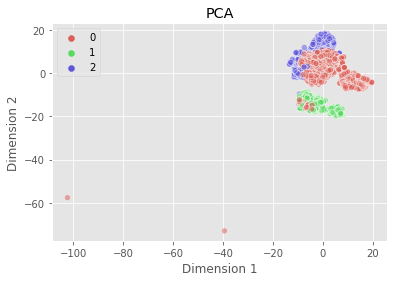

In [188]:
# Creating a plot of subplots for PCA
# plt.suptitle('MNIST')
# plt.subplot(1, 2, 1)
plt.title('PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
sns.scatterplot(x=pca[:,0],y=pca[:,1], hue=K_cluster, palette=sns.color_palette("hls", num_clusters), legend='full', alpha=0.5)

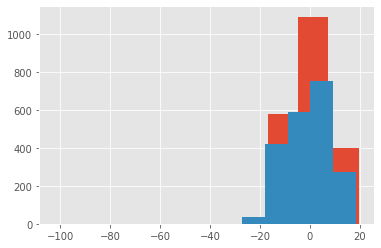

In [189]:
plt.hist(pca[:,0])
plt.hist(pca[:,1])
plt.show()